# Explore Entur Vehicle Monitoring

In [14]:
import pandas as pd

from spartid_pubtransport import vehiclemonitoring

## Use internal function to get geopandas GeoDataFrame

In [43]:
gdf = vehiclemonitoring.get_vehicles()
gdf.dtypes

RecordedAtTime                 datetime64[ns, UTC+01:00]
ValidUntilTime                 datetime64[ns, UTC+01:00]
LineRef                                  string[pyarrow]
VehicleMode                              string[pyarrow]
OperatorRef                              string[pyarrow]
VehicleFeatureRef                        string[pyarrow]
OriginRef                                string[pyarrow]
OriginName                               string[pyarrow]
DestinationRef                           string[pyarrow]
DestinationName                          string[pyarrow]
Monitored                                string[pyarrow]
InCongestion                             string[pyarrow]
DataSource                               string[pyarrow]
Bearing                                   float[pyarrow]
Delay                                    timedelta64[ns]
VehicleStatus                            string[pyarrow]
VehicleRef                               string[pyarrow]
IsCompleteStopSequence         

In [48]:
bins = [
    pd.Timedelta(days=-1),
    pd.Timedelta(minutes=0),
    pd.Timedelta(minutes=5),
    pd.Timedelta(minutes=10),
    pd.Timedelta(minutes=20),
    pd.Timedelta(minutes=30),
    pd.Timedelta(days=4),
]

labels = ["unreasonable", "0-5min", "5-10min", "10-20min", "20-30min", "30min+"]

one_hour = pd.Timestamp.now(tz="Europe/Berlin") - pd.Timedelta(hours=3)
print(one_hour)
(
    gdf.assign(
        delay_bin=pd.cut(
            gdf["Delay"], bins, labels=labels
        ),  # .astype(str).fillna("Unknown"),
        delay_seconds=gdf["Delay"].dt.seconds,
    )
    # [["RecordedAtTime", "ValidUntilTime", "Delay", "delay_seconds", "delay_bin"]]
    .query("RecordedAtTime < @one_hour")
    .sort_values("Delay")
)

2024-03-29 22:37:15.077941+01:00


,RecordedAtTime,ValidUntilTime,LineRef,VehicleMode,OperatorRef,VehicleFeatureRef,OriginRef,OriginName,DestinationRef,DestinationName,...,ItemIdentifier,Occupancy,BlockRef,JourneyPatternRef,JourneyPatternName,DirectionName,LocationRecordedAtTime,geometry,delay_bin,delay_seconds
1442,2024-03-27 09:05:05+01:00,NaT,NOR:Line:8552,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (15.24260 67.76433),unreasonable,54004.0
406,2024-03-27 07:55:28+01:00,NaT,NOR:Line:3705,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (12.63115 66.02096),unreasonable,60507.0
539,2024-03-29 20:59:03+01:00,2024-03-30 02:59:03+01:00,<NA>,bus,OST:Operator:923,SignageModeAutomatic,NSR:Quay:BOR:Quay:101990313,Garasje Halden,BOR:Quay:101990313,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (11.28095 59.13057),unreasonable,61142.0
450,2024-03-25 08:18:04+01:00,NaT,NOR:Line:3705,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (12.57497 66.00706),unreasonable,61864.0
90,2024-03-23 08:51:59+01:00,NaT,NOR:Line:8640,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (17.42907 68.40947),unreasonable,63419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,2024-03-27 14:38:05+01:00,NaT,NOR:Line:8200,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (14.43987 67.27757),30min+,8583.0
1628,2024-03-27 11:46:04+01:00,NaT,NOR:Line:8871,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (13.19220 65.83772),30min+,16863.0
1704,2024-03-29 22:09:30+01:00,2024-03-30 04:09:30+01:00,TRO:Line:1_24,bus,TRO:Operator:960,SignageModeAutomatic,NSR:Quay:91967,Skognesvegen,NSR:Quay:91451,Mortensnes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (19.08067 69.67842),30min+,19769.0
226,2024-03-29 22:01:05+01:00,2024-03-30 04:01:05+01:00,TRO:Line:1_28,bus,TRO:Operator:960,SignageModeAutomatic,NSR:Quay:88357,Hamna skole øst,NSR:Quay:91888,Solligården,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (18.74603 69.67923),30min+,20644.0


In [4]:
# Skip not json serializable columns
show_coluns = (
    gdf.dtypes.astype(str).to_frame("dtype").query("~dtype.str.contains('time')").index
)

In [5]:
gdf.astype("str")

,RecordedAtTime,ValidUntilTime,LineRef,VehicleMode,OperatorRef,VehicleFeatureRef,OriginRef,OriginName,DestinationRef,DestinationName,...,DirectionRef,VehicleJourneyRef,OriginAimedDepartureTime,DestinationAimedArrivalTime,BlockRef,JourneyPatternRef,JourneyPatternName,DirectionName,LocationRecordedAtTime,geometry
0,2024-03-29 17:28:57+01:00,2024-03-29 23:28:57+01:00,SKY:Line:5,bus,SKY:Operator:44,SignageModeAutomatic,NSR:Quay:12016437,Sletten,NSR:Quay:106946,Fyllingsdalen terminal,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.357222 60.384139)
1,2024-03-29 17:28:56+01:00,2024-03-29 23:28:56+01:00,SKY:Line:5,bus,SKY:Operator:44,SignageModeAutomatic,NSR:Quay:12012289,Fyllingsdalen terminal E,NSR:Quay:105587,Sletten,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.352925 60.385054)
2,2024-03-29 17:28:46+01:00,2024-03-29 23:28:46+01:00,SKY:Line:5,bus,SKY:Operator:44,SignageModeAutomatic,NSR:Quay:12016437,Sletten,NSR:Quay:106946,Fyllingsdalen terminal,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.358935 60.347517)
3,2024-03-29 17:29:04+01:00,2024-03-29 23:29:04+01:00,SKY:Line:552,bus,SKY:Operator:38,SignageModeAutomatic,NSR:Quay:12197963,Svortland terminal D,NSR:Quay:50292,Langevåg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.184422 59.595282)
4,2024-03-22 17:01:38+01:00,NaT,NOR:Line:8647,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (16.707697 68.532235)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2024-03-29 17:28:43.452000+01:00,2024-03-29 17:38:43.452000+01:00,VYX:Line:125,unknown,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (9.576748 62.45913)
2007,2024-03-29 12:12:46+01:00,2024-03-29 18:12:46+01:00,AKT:Line:1019,bus,AKT:Operator:395,SignageModeAutomatic,NSR:Quay:43077,Fagerholt / Harald Gillesvei,NSR:Quay:41340,Suldalen,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (7.950536 58.153574)
2008,2024-03-29 16:34:59+01:00,2024-03-29 22:34:59+01:00,SKY:Line:325,bus,SKY:Operator:12,SignageModeAutomatic,NSR:Quay:12604329,Manger senter,GAR3.614,skyss.no,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.055793 60.640948)
2009,2024-03-29 17:28:54+01:00,2024-03-29 23:28:54+01:00,SKY:Line:326,bus,SKY:Operator:12,SignageModeAutomatic,NSR:Quay:12633063,Knarvik terminal B,NSR:Quay:57786,Mastrevik torg,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (5.006974 60.701268)


In [6]:
gdf["VehicleMode"].value_counts()

VehicleMode
unknown    964
bus        915
ferry       76
rail        56
Name: count, dtype: int64[pyarrow]

In [7]:
gdf[show_coluns].explore(cmap="Blues")

<Axes: xlabel='VehicleMode'>

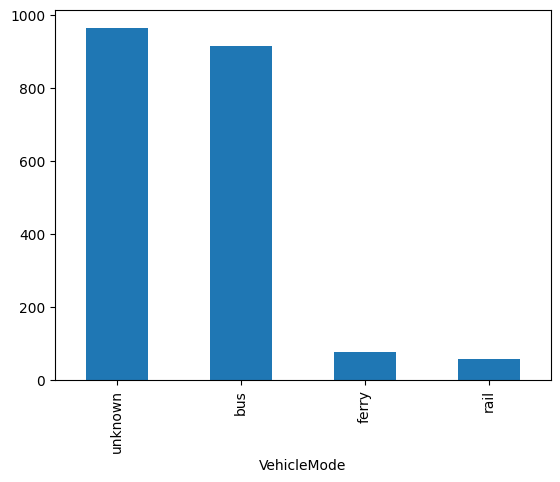

In [8]:
gdf["VehicleMode"].value_counts().plot.bar()

<Axes: xlabel='DataSource'>

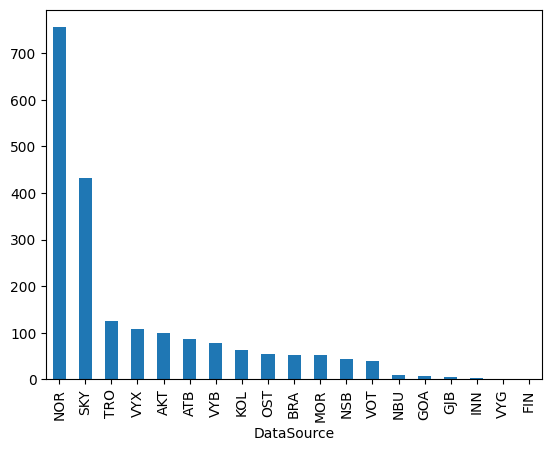

In [9]:
gdf["DataSource"].value_counts().plot.bar()